In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [15]:
import tensorflow as tf
class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self,epoch,logs={}):
            if(logs.get('accuracy') > 0.99):
                print("reached 99% accuracy so cancelling training!")
                self.model.stop_training = True
    

    # YOUR CODE SHOULD END HERE
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
    # YOUR CODE SHOULD START HERE
x_train,x_test = x_train / 255.0, x_test / 255.0
    
    
callbacks = myCallback()

    # YOUR CODE SHOULD END HERE
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(512,activation='relu'),
  tf.keras.layers.Dense(10,activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    
    # model fitting
history = model.fit(x_train, y_train, epochs=6, callbacks=[callbacks])
    # model fitting
    
   

Epoch 1/6
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2027 - accuracy: 0.9392
Epoch 2/6
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0806 - accuracy: 0.9753
Epoch 3/6
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0544 - accuracy: 0.9830
Epoch 4/6
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0371 - accuracy: 0.9880
Epoch 5/6
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0280 - accuracy: 0.9912
reached 99% accuracy so cancelling training!


In [16]:
model.predict(x_test)


array([[4.6246482e-11, 4.4323670e-10, 1.4740350e-08, ..., 9.9999380e-01,
        6.1813532e-10, 2.1595103e-08],
       [6.1937287e-12, 8.4199732e-09, 9.9999976e-01, ..., 1.6640052e-15,
        4.9885642e-09, 5.4869272e-17],
       [8.4090146e-08, 9.9959344e-01, 1.6595444e-05, ..., 5.3545518e-05,
        2.7613662e-04, 2.7465705e-07],
       ...,
       [1.6749428e-14, 3.3025839e-11, 3.4019537e-13, ..., 3.4629981e-08,
        2.2175543e-07, 2.7294770e-06],
       [3.7685879e-10, 6.9084641e-13, 2.1756451e-13, ..., 1.3599637e-12,
        4.8090163e-07, 3.6081905e-15],
       [1.7341529e-09, 9.6597535e-13, 1.0229879e-08, ..., 2.5731353e-12,
        1.0174382e-08, 1.8206543e-10]], dtype=float32)

In [17]:
model.evaluate(x_test, y_test)
classifications = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0743 - accuracy: 0.9781


5


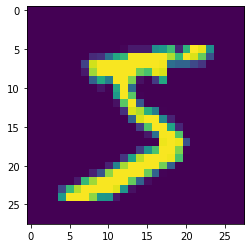

In [18]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print(y_train[0])


1


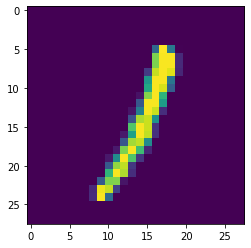

In [20]:
plt.imshow(x_train[99])
print(y_train[99])